In [40]:
import pandas as pd
import zipfile 
import glob, os
import numpy as np
import pylab as pl
import json
import urllib.request
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ll84_2011 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2011_.csv')
ll84_2012 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2012_.csv')
ll84_2013 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
ll84_2014 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law__2014_.csv')

In [3]:
print(ll84_2011.columns)
print(ll84_2012.columns)
print(ll84_2013.columns)
print(ll84_2014.columns)

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI',
       'Weather Normalized Source EUI', 'Water per Square Foot',
       'ENERGY STAR Score', 'GHG', 'Reported Building Square Footage',
       'Reported Facility Type', 'Number of Buildings', 'Reported BINs'],
      dtype='object')
Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs'],
      dtype='object')
Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Repor

In [4]:
print("******2011******")
print(len(ll84_2011))
print(len(ll84_2011[ ~isnan(ll84_2011['Site EUI']) ] ))


print("******2012******")
print(len(ll84_2012))
print(len(ll84_2012[ ~isnan(ll84_2012['Site EUI(kBtu/ft2)']) ] ))

print("******2013******")
print(len(ll84_2013))
print(len(ll84_2013[ ll84_2013['Site EUI(kBtu/ft2)'] != nan ] ))

print("******2014******")
print(len(ll84_2014))
print(len(ll84_2014[ ll84_2014['Site EUI(kBtu/ft2)'] != nan ] ))




******2011******
4081
2319
******2012******
14112
11074
******2013******
16170
16170
******2014******
13974
13974


In [5]:
# ll84_2011[ ~isnan(ll84_2011['Site EUI']) ]['Site EUI']

In [4]:
ll84_2014.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'BBL on the Covered Buildings List',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [5]:
ll84_2014.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Zip Code,BBL on the Covered Buildings List,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,7365,1009970029,NaN,NaN,1022631,1155,AVENUE OF THE AMER,MANHATTAN,10036,Yes,...,No,None,90,3054.3,0,3054.3,686902,734668,Office,1
1,8139,1013150001,NaN,NaN,1037545,655,3 AVENUE,MANHATTAN,10017,Yes,...,No,None,86,2453.3,0,2453.3,384432,380000,Office,1
2,8604,1009990019,NaN,NaN,1022667,114,WEST 47 STREET,MANHATTAN,10036,Yes,...,No,None,84,2961.2,0,2961.2,572369,565000,Financial Office,1
3,8841,1013190047,NaN,NaN,1037596,733,3 AVENUE,MANHATTAN,10017,Yes,...,No,None,75,2731.4,0,2731.4,362578,405399,Office,1
4,11809,1009950005,NaN,NaN,1085682,1472,BROADWAY,MANHATTAN,10036,Yes,...,No,None,61,13661.8,2557.4,11104.4,1601977,1642675,Office,1


In [11]:
# ll84_2014['Reported NYC Building Identification Numbers (BINs)']

In [68]:
mask = ( ll84_2014['Reported NYC Building Identification Numbers (BINs)'] != nan ) &  (ll84_2014['Site EUI(kBtu/ft2)'] != nan) & (ll84_2014['Primary Property Type - Self Selected'] == 'Multifamily Housing') & (ll84_2014['Total GHG Emissions(MtCO2e)'] != nan)
buildings2014 = ll84_2014[ mask ]
mask2 = ( buildings2014['Reported NYC Building Identification Numbers (BINs)'] != 'Not Available' ) & (buildings2014['Site EUI(kBtu/ft2)'] != 'Not Available') & (buildings2014['Total GHG Emissions(MtCO2e)'] != 'Not Available')
buildings2014 = buildings2014[ mask2 ]
mask3 = ( buildings2014['Reported NYC Building Identification Numbers (BINs)'] != 'See Primary BBL' ) & (buildings2014['Site EUI(kBtu/ft2)'] != 'See Primary BBL') & (buildings2014['Total GHG Emissions(MtCO2e)'] != 'See Primary BBL')
buildings2014 = buildings2014[ mask3 ]


In [69]:
# buildings2014['Site EUI(kBtu/ft2)'].astype(float)

In [28]:
buildings2014[['Site EUI(kBtu/ft2)']].astype(float).sum()

Site EUI(kBtu/ft2)    1645283.2
dtype: float64

In [29]:
buildings2014.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Zip Code,BBL on the Covered Buildings List,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
80,1443214,1010890001,NaN,NaN,1085803,1,RIVER PLACE,MANHATTAN,10036,Yes,...,No,Manual,3,7540.9,4501.2,3039.7,887879,887879,Multifamily Housing,1
156,1847014,1010287501,NaN,NaN,1070014,235,WEST 56 STREET,MANHATTAN,10019,Yes,...,No,None,1,2097196.5,75.5,2097121,616000,729506,Multifamily Housing,1
159,1944274,4019370001,NaN,NaN,4047361,54-09,100 STREET,QUEENS,11368,Yes,...,Yes,None,54,681.5,423.5,258,133158,266316,Multifamily Housing,2
165,2008836,1000167517,NaN,NaN,1087842,70,BATTERY PLACE,MANHATTAN,10280,Yes,...,No,None,69,2513.8,1956.1,557.6,457771,508458,Multifamily Housing,1
166,2008956,1000160185,NaN,NaN,1086547,211,NORTH END AVENUE,MANHATTAN,10282,Yes,...,No,Manual,27,1676.8,997.2,679.6,300000,278142,Multifamily Housing,1


In [34]:
print(len(buildings2014))
print(len(ll84_2014[ll84_2014['Primary Property Type - Self Selected'] == 'Multifamily Housing']))
print(len(ll84_2014))

7888
8552
13974


In [85]:
pl.histogram(buildings2014['Site EUI(kBtu/ft2)'])
# pl.show()

(array([7871,    2,    3,    2,    4,    4,    0,    1,    0,    1]),
 array([      0.  ,   11775.55,   23551.1 ,   35326.65,   47102.2 ,
          58877.75,   70653.3 ,   82428.85,   94204.4 ,  105979.95,
         117755.5 ]))

In [43]:
income = pd.read_csv('income.csv')
income.ctlabel = income.ctlabel.astype(float).astype(int)
incomed = income[['ctlabel', 'median_household_income']].set_index('ctlabel').to_dict()
incomed = incomed['median_household_income']

In [44]:
mnPluto = pd.read_csv('nyc_pluto_15v1/Mn.csv')
bkPluto = pd.read_csv('nyc_pluto_15v1/BK.csv')
bxPluto = pd.read_csv('nyc_pluto_15v1/BK.csv')
siPluto = pd.read_csv('nyc_pluto_15v1/SI.csv')
qnPluto = pd.read_csv('nyc_pluto_15v1/QN.csv')
print(mnPluto.columns)
mnPluto.head()

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,8,10,27,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,6,7,8,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'LtdHeight', 'AllZoning1',
       'AllZoning2', 'SplitZone', 'BldgClass', 'LandUse', 'Easements',
       'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
       'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',
       'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt', 'BuiltCode',
       'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL', 'CondoNo',
       'Tract2010', 'XCoord', 'YCoord', 'ZoneMa

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5,1018,2,1,10004,E007,...,190225,16a,Y,199 999,10101,,0,,1,15v1
1,MN,1,101,101,1,1001,2,1,10004,E007,...,190636,16a,Y,199 999,10101,,0,,1,15v1
2,MN,1,201,101,1,1000,2,1,10004,E007,...,193648,12b,,199 999,10101,,0,,1,15v1
3,MN,1,301,101,,,2,1,10004,E007,...,,12b,,199 999,10101,,0,,4,15v1
4,MN,1,401,101,,,2,1,10004,E007,...,,12b,,1 99 999,10101,,0,,4,15v1


In [45]:
nycPluto = pd.concat([mnPluto, bkPluto, bxPluto, qnPluto, siPluto])

In [70]:
buildings2014 = buildings2014.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'});

In [71]:
buildings2014.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'BBL on the Covered Buildings List',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [76]:
buildings2014.dtypes

Record Number                                                      float64
BBL                                                                  int64
Co-reported BBL Status                                              object
BBLs Co-reported                                                    object
Reported NYC Building Identification Numbers (BINs)                float64
Street Number                                                      float64
Street Name                                                         object
Borough                                                             object
Zip Code                                                           float64
BBL on the Covered Buildings List                                   object
DOF Benchmarking Submission Status                                  object
Site EUI(kBtu/ft2)                                                 float64
Weather Normalized Site EUI(kBtu/ft2)                              float64
Source EUI(kBtu/ft2)     

In [75]:
buildings2014 = buildings2014.convert_objects(convert_numeric=True)

In [77]:
len(mnPluto)

43231

In [78]:
nycBuildings2014 = pd.merge(buildings2014,nycPluto,on='BBL')
len(nycBuildings2014)

7995

In [79]:
mnBuildings2014 = pd.merge(buildings2014,mnPluto,on='BBL')
len(mnBuildings2014)

3165

In [80]:
bkBuildings2014 = pd.merge(buildings2014,bkPluto,on='BBL')
len(bkBuildings2014)

1679

In [81]:
bxBuildings2014 = pd.merge(buildings2014,bxPluto,on='BBL')
len(bxBuildings2014)

1679

In [82]:
qnBuildings2014 = pd.merge(buildings2014,qnPluto,on='BBL')
len(qnBuildings2014)

1403

In [83]:
siBuildings2014 = pd.merge(buildings2014,siPluto,on='BBL')
len(siBuildings2014)

69

In [27]:
# print(mnBuildings2012.columns)
# mnBuildings2012.loc[0]

In [84]:
mnBuildings2014['Site EUI(kBtu/ft2)'].describe()

count      3165.000000
mean        362.655735
std        4202.097120
min           0.100000
25%          69.500000
50%          85.400000
75%         104.900000
max      117755.500000
Name: Site EUI(kBtu/ft2), dtype: float64

In [86]:
# mnBuildings2012['totalEUI'] = mnBuildings2012['Site EUI(kBtu/ft2)'] * mnBuildings2012['Property Floor Area (Buildngs and Parking)(ft2)']

In [87]:
# totalEUI = mnBuildings2012[mnBuildings2012.totalEUI<2*10e6].totalEUI.tolist()

In [88]:
# totalEUI = sorted(totalEUI)

In [89]:
# plt.ylim(0,1e7)
# plt.hist(totalEUI, 50)

In [91]:
siteEUI = mnBuildings2014[mnBuildings2014['Site EUI(kBtu/ft2)']<300]['Site EUI(kBtu/ft2)'].tolist()
print(len(siteEUI))
# plt.hist(siteEUI,50);

3137


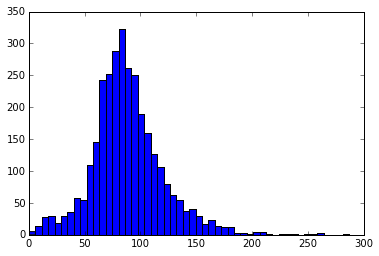

In [92]:
plt.hist(siteEUI,50);

In [96]:
print(mnBuildings2014.columns.tolist())

['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported', 'Reported NYC Building Identification Numbers (BINs)', 'Street Number', 'Street Name', 'Borough_x', 'Zip Code', 'BBL on the Covered Buildings List', 'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)', 'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)', 'Weather Normalized Source EUI(kBtu/ft2)', 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', 'Automatic Water Benchmarking Eligible', 'Reported Water Method', 'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)', 'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)', 'Reported Property Floor Area (Building(s)) (ft²)', 'DOF Property Floor Area (Buildngs and Parking)(ft2)', 'Primary Property Type - Self Selected', 'DOF Number of Buildings', 'Borough_y', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'Zone

In [105]:
mnBuildings2014En = mnBuildings2014[mnBuildings2014['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'ZipCode',
                                   'DOF Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront', 'Direct GHG Emissions(MtCO2e)', 
                                    'Indirect GHG Emissions(MtCO2e)', 'Reported Property Floor Area (Building(s)) (ft²)', 
                                    'CB2010', 'CT2010', 'Total GHG Emissions(MtCO2e)'
                                    ,'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

mnBuildings2014En = mnBuildings2014En.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Reported Property Floor Area (Building(s)) (ft²)' : 'floorArea'
                                 , 'DOF Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 , 'Direct GHG Emissions(MtCO2e)' : 'DirectGHG' 
                                 , 'Indirect GHG Emissions(MtCO2e)' : 'InderectGHG'
                                 ,'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)':'water'})

mnBuildings2014En['totalEUI'] = mnBuildings2014En.siteEUI * mnBuildings2014En.floorArea
mnBuildings2014En['age20'] = mnBuildings2014En['YearBuilt'] > 1995
mnBuildings2014En['age40'] = (mnBuildings2014En['YearBuilt'] > 1975) & ( mnBuildings2014En['YearBuilt'] < 1995)
mnBuildings2014En['age60'] = (mnBuildings2014En['YearBuilt'] > 1955) & (mnBuildings2014En['YearBuilt'] < 1975)
mnBuildings2014En['age60ab'] = mnBuildings2014En['YearBuilt'] < 1955
mnBuildings2014En['nonRes'] = mnBuildings2014En.floorArea.astype(float) -  mnBuildings2014En.ResArea.astype(float)
mnBuildings2014En["CT2010"] = mnBuildings2014En["CT2010"].astype(float).astype(int)
mnBuildings2014En['income'] = mnBuildings2014En["CT2010"].map(incomed.get)
mnBuildings2014En = mnBuildings2014En[mnBuildings2014En.income>0]

In [106]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= mnBuildings2014En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.747
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           2.90e-06
Time:                        00:20:06   Log-Likelihood:                -14852.
No. Observations:                3033   AIC:                         2.972e+04
Df Residuals:                    3027   BIC:                         2.975e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             90.3428      1.499     60.266      0.000        87.404    93.282
LtdHeight[T.LH-1 ]     2.6578     22.934      0.116      0.908       -42.310    47.625
LtdHeight[T.LH-1A]   -16.3626      4.199     -3.897      0.000       -24.595    -8.130
I(income / 10000)     -0.8168      0.241     -3.384      0.001        -1.290    -0.344
NumFloors              0.1972      0.068      2.898      0.004         0.064     0.331
floorArea          -3.545e-06   2.39e-06     -1.480      0.139     -8.24e-06  1.15e-06
==============================================================================
Omnibus:                      491.861   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1465.165
Skew:                           0.840   Prob(JB):                         0.00
Kurtosis:                       5.961   Cond. No.                     1.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
mnBuildings2014En.columns

Index(['siteEUI', 'ZipCode', 'numBldgs', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
       'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 'CommFAR',
       'FacilFAR', 'BuiltFAR', 'ResidFAR', 'LotArea', 'LotFront', 'LotDepth',
       'BldgFront', 'DirectGHG', 'InderectGHG', 'floorArea', 'CB2010',
       'CT2010', 'GHG', 'water', 'ProxCode', 'LtdHeight', 'HistDist',
       'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'totalEUI', 'age20', 'age40',
       'age60', 'age60ab', 'nonRes', 'income'],
      dtype='object')

In [111]:
mnBuildings2014En['GHGpersqr'] = mnBuildings2014En['GHG']/mnBuildings2014En['floorArea']

In [115]:
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000)   + LtdHeight+ ProxCode+ UnitsTotal  + NumFloors  + age20 + age40 + age60 +I(income/10000)', data= mnBuildings2014En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     585.9
Date:                Wed, 16 Dec 2015   Prob (F-statistic):               0.00
Time:                        00:22:14   Log-Likelihood:                -24678.
No. Observations:                3033   AIC:                         4.938e+04
Df Residuals:                    3020   BIC:                         4.946e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              225.4244     49.595      4.545      0.000       128.181   322.668
LtdHeight[T.LH-1 ]      49.4880    586.882      0.084      0.933     -1101.241  1200.217
LtdHeight[T.LH-1A]      27.2052    108.360      0.251      0.802      -185.261   239.672
ProxCode[T.1]          159.3795     46.015      3.464      0.001        69.155   249.604
ProxCode[T.2]         -132.0350     43.031     -3.068      0.002      -216.408   -47.662
ProxCode[T.3]         -192.1052     41.829     -4.593      0.000      -274.121  -110.089
age20[T.True]         -286.5168     53.321     -5.373      0.000      -391.066  -181.968
age40[T.True]         -322.6377     57.019     -5.658      0.000      -434.438  -210.838
age60[T.True]          -42.0118     42.321     -0.993      0.321      -124.992    40.969
I(AssessTot / 10000)     0.1340      0.015      9.157      0.000         0.105     0.163
UnitsTotal               3.9485      0.106     37.359      0.000         3.741     4.156
NumFloors               19.7414      2.218      8.902      0.000        15.393    24.089
I(income / 10000)      -22.2514      6.237     -3.567      0.000       -34.482   -10.021
==============================================================================
Omnibus:                     2517.143   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           498760.736
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      65.512   Cond. No.                     9.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
nycBuildings2014En = nycBuildings2014[nycBuildings2014['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'ZipCode',
                                   'DOF Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront', 'Direct GHG Emissions(MtCO2e)', 
                                    'Indirect GHG Emissions(MtCO2e)', 'Reported Property Floor Area (Building(s)) (ft²)', 
                                    'CB2010', 'CT2010', 'Total GHG Emissions(MtCO2e)'
                                    ,'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea',
                                    'Reported NYC Building Identification Numbers (BINs)']]

nycBuildings2014En = nycBuildings2014En.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Reported Property Floor Area (Building(s)) (ft²)' : 'floorArea'
                                 , 'DOF Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 , 'Direct GHG Emissions(MtCO2e)' : 'DirectGHG' 
                                 , 'Indirect GHG Emissions(MtCO2e)' : 'InderectGHG'
                                 ,'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)':'water'})

nycBuildings2014En['totalEUI'] = nycBuildings2014En.siteEUI * nycBuildings2014En.floorArea
nycBuildings2014En['age20'] = nycBuildings2014En['YearBuilt'] > 1995
nycBuildings2014En['age40'] = (nycBuildings2014En['YearBuilt'] > 1975) & ( nycBuildings2014En['YearBuilt'] < 1995)
nycBuildings2014En['age60'] = (nycBuildings2014En['YearBuilt'] > 1955) & (nycBuildings2014En['YearBuilt'] < 1975)
nycBuildings2014En['age60ab'] = nycBuildings2014En['YearBuilt'] < 1955
nycBuildings2014En['nonRes'] = nycBuildings2014En.floorArea.astype(float) -  nycBuildings2014En.ResArea.astype(float)
nycBuildings2014En["CT2010"] = nycBuildings2014En["CT2010"].astype(float).astype(int)
nycBuildings2014En['income'] = nycBuildings2014En["CT2010"].map(incomed.get)
nycBuildings2014En = nycBuildings2014En[nycBuildings2014En.income>0]

In [156]:
nycBuildings2014En.to_csv('nycBuildings2014.csv')

In [148]:
nycBuildings2014En = nycBuildings2014En.convert_objects(convert_numeric=True)

In [120]:
print(nycBuildings2014En.columns)
nycBuildings2014En.head()

Index(['siteEUI', 'ZipCode', 'numBldgs', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
       'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 'CommFAR',
       'FacilFAR', 'BuiltFAR', 'ResidFAR', 'LotArea', 'LotFront', 'LotDepth',
       'BldgFront', 'DirectGHG', 'InderectGHG', 'floorArea', 'CB2010',
       'CT2010', 'GHG', 'water', 'ProxCode', 'LtdHeight', 'HistDist',
       'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'totalEUI', 'age20', 'age40',
       'age60', 'age60ab', 'nonRes', 'income'],
      dtype='object')


,siteEUI,ZipCode,numBldgs,UnitsRes,UnitsTotal,YearBuilt,LotArea,NumFloors,ResArea,RetailArea,...,StrgeArea,FactryArea,OtherArea,totalEUI,age20,age40,age60,age60ab,nonRes,income
0,134.6,10036,1,921,927,1999,110080,40,788774,40068,...,0,0,0,119508513.4,True,False,False,False,99105,30833
2,83.2,11368,2,294,294,1989,127000,8,266316,0,...,0,0,0,11078745.6,False,True,False,False,-133158,31361
3,95.1,10280,1,247,250,2006,35352,33,337384,4530,...,0,0,0,43534022.1,True,False,False,False,120387,107611
4,89.9,10282,1,253,256,2004,14451,24,276141,0,...,0,0,0,26970000.0,True,False,False,False,23859,107611
5,108.7,10282,1,293,294,2002,16653,27,334939,0,...,0,0,19195,39603649.3,True,False,False,False,29400,107611


In [150]:
# nycBuildings2014En.ProxCode

In [131]:
# nycBuildings2014En['ProxCode']

In [152]:
model2 = smf.ols( formula= 'GHG ~ I(AssessTot/10000)   + I(income/10000) + C(ProxCode) + UnitsTotal  + NumFloors  + age20 + age40 + age60', data= nycBuildings2014En).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     344.1
Date:                Wed, 16 Dec 2015   Prob (F-statistic):               0.00
Time:                        00:34:53   Log-Likelihood:                -68221.
No. Observations:                7685   AIC:                         1.365e+05
Df Residuals:                    7674   BIC:                         1.365e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              137.9311     54.136      2.548      0.011        31.810   244.052
C(ProxCode)[T.1]       264.9430     60.960      4.346      0.000       145.444   384.442
C(ProxCode)[T.2]       -39.9421     66.007     -0.605      0.545      -169.333    89.449
C(ProxCode)[T.3]      -103.4831     65.497     -1.580      0.114      -231.875    24.909
age20[T.True]         -207.6367     70.871     -2.930      0.003      -346.562   -68.711
age40[T.True]         -188.7487     88.654     -2.129      0.033      -362.535   -14.962
age60[T.True]          166.1699     50.414      3.296      0.001        67.344   264.996
I(AssessTot / 10000)     0.0346      0.024      1.438      0.150        -0.013     0.082
I(income / 10000)      -41.7932      9.355     -4.468      0.000       -60.131   -23.455
UnitsTotal               5.0702      0.139     36.399      0.000         4.797     5.343
NumFloors               21.9060      3.591      6.101      0.000        14.867    28.945
==============================================================================
Omnibus:                    21644.821   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1092145516.114
Skew:                          36.704   Prob(JB):                         0.00
Kurtosis:                    1848.358   Cond. No.                     7.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= nycBuildings2014En).fit()
# model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.30
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           2.36e-24
Time:                        00:23:46   Log-Likelihood:                -37426.
No. Observations:                7685   AIC:                         7.486e+04
Df Residuals:                    7679   BIC:                         7.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             86.4590      0.882     98.043      0.000        84.730    88.188
LtdHeight[T.LH-1 ]    -8.6166      5.625     -1.532      0.126       -19.644     2.411
LtdHeight[T.LH-1A]   -15.0073      4.067     -3.690      0.000       -22.979    -7.036
I(income / 10000)     -0.8134      0.169     -4.808      0.000        -1.145    -0.482
NumFloors              0.2425      0.049      4.938      0.000         0.146     0.339
floorArea           8.273e-06    1.4e-06      5.912      0.000      5.53e-06   1.1e-05
==============================================================================
Omnibus:                      676.531   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2097.419
Skew:                           0.454   Prob(JB):                         0.00
Kurtosis:                       5.393   Cond. No.                     4.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# print(nycBuildings2012.columns)
bkBuildings2012 = bkBuildings2012[bkBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

bkBuildings2012 = bkBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

bkBuildings2012['totalEUI'] = bkBuildings2012.siteEUI * bkBuildings2012.floorArea
bkBuildings2012['age20'] = bkBuildings2012['YearBuilt'] > 1995
bkBuildings2012['age40'] = (bkBuildings2012['YearBuilt'] > 1975) & ( bkBuildings2012['YearBuilt'] < 1995)
bkBuildings2012['age60'] = (bkBuildings2012['YearBuilt'] > 1955) & (bkBuildings2012['YearBuilt'] < 1975)
bkBuildings2012['age60ab'] = bkBuildings2012['YearBuilt'] < 1955
bkBuildings2012['nonRes'] = bkBuildings2012.floorArea.astype(float) -  bkBuildings2012.ResArea.astype(float)
bkBuildings2012["CT2010"] = bkBuildings2012["CT2010"].astype(float).astype(int)
bkBuildings2012['income'] = bkBuildings2012["CT2010"].map(incomed.get)
bkBuildings2012 = bkBuildings2012[bkBuildings2012.income>0]

In [42]:
bkBuildings2012['ProxCode'] = bkBuildings2012['ProxCode'].astype(int)

In [43]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= bkBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     44.86
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           9.93e-36
Time:                        10:26:25   Log-Likelihood:                -7678.2
No. Observations:                1589   AIC:                         1.537e+04
Df Residuals:                    1584   BIC:                         1.539e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             65.9555      2.103     31.359      0.000        61.830    70.081
LtdHeight[T.LH-1 ]    -0.8855      7.836     -0.113      0.910       -16.255    14.484
I(income / 10000)      0.4224      0.403      1.049      0.295        -0.368     1.213
NumFloors              0.3537      0.176      2.005      0.045         0.008     0.700
floorArea           1.322e-05   1.03e-06     12.853      0.000      1.12e-05  1.52e-05
==============================================================================
Omnibus:                      157.038   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.398
Skew:                           0.303   Prob(JB):                    8.68e-178
Kurtosis:                       6.457   Cond. No.                     8.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ UnitsTotal  + ProxCode+ NumFloors  + age20 + age40 + age60 +I(income/10000)', data= bkBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     69.07
Date:                Fri, 11 Dec 2015   Prob (F-statistic):          2.44e-107
Time:                        11:11:20   Log-Likelihood:                -16177.
No. Observations:                1585   AIC:                         3.237e+04
Df Residuals:                    1575   BIC:                         3.243e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -3989.9374    599.851     -6.652      0.000     -5166.527 -2813.348
age20[T.True]          115.8572    622.144      0.186      0.852     -1104.461  1336.175
age40[T.True]        -1303.5677    929.473     -1.402      0.161     -3126.702   519.567
age60[T.True]         1711.3503    421.801      4.057      0.000       884.000  2538.701
I(AssessTot / 10000)     4.3179      0.694      6.223      0.000         2.957     5.679
siteEUI                 85.7734      5.304     16.171      0.000        75.370    96.177
UnitsTotal               8.1088      1.591      5.097      0.000         4.988    11.229
ProxCode               735.5303    279.693      2.630      0.009       186.921  1284.140
NumFloors             -364.8293     51.266     -7.116      0.000      -465.386  -264.272
I(income / 10000)     -315.0841     85.758     -3.674      0.000      -483.297  -146.872
==============================================================================
Omnibus:                     2096.130   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336973.139
Skew:                           7.321   Prob(JB):                         0.00
Kurtosis:                      72.914   Cond. No.                     3.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# print(nycBuildings2012.columns)
bxBuildings2012 = bxBuildings2012[bxBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

bxBuildings2012 = bxBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

bxBuildings2012['totalEUI'] = bxBuildings2012.siteEUI * bxBuildings2012.floorArea
bxBuildings2012['age20'] = bxBuildings2012['YearBuilt'] > 1995
bxBuildings2012['age40'] = (bxBuildings2012['YearBuilt'] > 1975) & ( bxBuildings2012['YearBuilt'] < 1995)
bxBuildings2012['age60'] = (bxBuildings2012['YearBuilt'] > 1955) & (bxBuildings2012['YearBuilt'] < 1975)
bxBuildings2012['age60ab'] = bxBuildings2012['YearBuilt'] < 1955
bxBuildings2012['nonRes'] = bxBuildings2012.floorArea.astype(float) -  bxBuildings2012.ResArea.astype(float)
bxBuildings2012["CT2010"] = bxBuildings2012["CT2010"].astype(float).astype(int)
bxBuildings2012["ProxCode"] = bxBuildings2012["ProxCode"].astype(float).astype(int)
bxBuildings2012['income'] = bxBuildings2012["CT2010"].map(incomed.get)
bxBuildings2012 = bxBuildings2012[bxBuildings2012.income>0]
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= bxBuildings2012).fit()
model1.summary()
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ UnitsTotal  + ProxCode+ NumFloors  + age20 + age40 + age60 +I(income/10000)', data= bxBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     62.12
Date:                Fri, 11 Dec 2015   Prob (F-statistic):          2.07e-106
Time:                        10:26:26   Log-Likelihood:                -16177.
No. Observations:                1585   AIC:                         3.238e+04
Df Residuals:                    1574   BIC:                         3.243e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -3982.5788    602.729     -6.608      0.000     -5164.815 -2800.343
LtdHeight[T.LH-1 ]     220.4970   1704.755      0.129      0.897     -3123.333  3564.327
age20[T.True]          110.1872    623.881      0.177      0.860     -1113.537  1333.912
age40[T.True]        -1300.5912    930.048     -1.398      0.162     -3124.855   523.672
age60[T.True]         1712.5713    422.038      4.058      0.000       884.755  2540.388
I(AssessTot / 10000)     4.3136      0.695      6.207      0.000         2.951     5.677
siteEUI                 85.7669      5.306     16.164      0.000        75.359    96.174
UnitsTotal               8.1124      1.592      5.097      0.000         4.991    11.234
ProxCode               734.2435    279.957      2.623      0.009       185.116  1283.371
NumFloors             -364.5530     51.326     -7.103      0.000      -465.228  -263.878
I(income / 10000)     -317.6212     87.999     -3.609      0.000      -490.229  -145.014
==============================================================================
Omnibus:                     2096.122   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336938.380
Skew:                           7.321   Prob(JB):                         0.00
Kurtosis:                      72.911   Cond. No.                     6.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# print(nycBuildings2012.columns)
siBuildings2012 = siBuildings2012[siBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

siBuildings2012 = siBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

siBuildings2012['totalEUI'] = siBuildings2012.siteEUI * siBuildings2012.floorArea
siBuildings2012['age20'] = siBuildings2012['YearBuilt'] > 1995
siBuildings2012['age40'] = (siBuildings2012['YearBuilt'] > 1975) & ( siBuildings2012['YearBuilt'] < 1995)
siBuildings2012['age60'] = (siBuildings2012['YearBuilt'] > 1955) & (siBuildings2012['YearBuilt'] < 1975)
siBuildings2012['age60ab'] = siBuildings2012['YearBuilt'] < 1955
siBuildings2012['nonRes'] = siBuildings2012.floorArea.astype(float) -  siBuildings2012.ResArea.astype(float)
siBuildings2012["CT2010"] = siBuildings2012["CT2010"].astype(float).astype(int)
siBuildings2012["ProxCode"] = siBuildings2012["ProxCode"].astype(float).astype(int)
siBuildings2012['income'] = siBuildings2012["CT2010"].map(incomed.get)
siBuildings2012 = siBuildings2012[siBuildings2012.income>0]
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI  + LtdHeight+ UnitsTotal  + ProxCode+ NumFloors  + age20 + age40 + age60 +I(income/10000)', data= siBuildings2012).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     11.60
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           8.16e-12
Time:                        10:26:26   Log-Likelihood:                -739.02
No. Observations:                  98   AIC:                             1498.
Df Residuals:                      88   BIC:                             1524.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1074.5732    281.364     -3.819      0.000     -1633.724  -515.422
age20[T.True]          439.2547    241.652      1.818      0.073       -40.978   919.488
age40[T.True]          273.0688    169.782      1.608      0.111       -64.337   610.475
age60[T.True]          471.0109    147.952      3.184      0.002       176.987   765.034
I(AssessTot / 10000)     0.0816      0.389      0.210      0.834        -0.692     0.855
siteEUI                  7.6709      2.068      3.709      0.000         3.561    11.781
UnitsTotal               1.5502      0.850      1.824      0.072        -0.139     3.239
ProxCode              -336.5016    132.412     -2.541      0.013      -599.642   -73.361
NumFloors               89.6122     20.153      4.447      0.000        49.562   129.663
I(income / 10000)       26.2303     19.052      1.377      0.172       -11.632    64.092
==============================================================================
Omnibus:                       77.564   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.658
Skew:                           2.624   Prob(JB):                    1.28e-106
Kurtosis:                      12.586   Cond. No.                     3.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= siBuildings2012).fit()
model1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.388
Date:                Fri, 11 Dec 2015   Prob (F-statistic):             0.0739
Time:                        10:26:26   Log-Likelihood:                -460.29
No. Observations:                  98   AIC:                             928.6
Df Residuals:                      94   BIC:                             938.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            80.1874      7.113     11.274      0.000        66.065    94.309
I(income / 10000)    -2.3429      0.935     -2.505      0.014        -4.200    -0.486
NumFloors             0.8526      1.111      0.768      0.445        -1.353     3.058
floorArea          6.237e-06   3.25e-05      0.192      0.848     -5.82e-05  7.07e-05
==============================================================================
Omnibus:                        3.563   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.880
Skew:                           0.355   Prob(JB):                        0.237
Kurtosis:                       3.448   Cond. No.                     4.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# print(nycBuildings2012.columns)
qnBuildings2012 = qnBuildings2012[qnBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

qnBuildings2012 = qnBuildings2012.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

qnBuildings2012['totalEUI'] = qnBuildings2012.siteEUI * qnBuildings2012.floorArea
qnBuildings2012['age20'] = qnBuildings2012['YearBuilt'] > 1995
qnBuildings2012['age40'] = (qnBuildings2012['YearBuilt'] > 1975) & ( qnBuildings2012['YearBuilt'] < 1995)
qnBuildings2012['age60'] = (qnBuildings2012['YearBuilt'] > 1955) & (qnBuildings2012['YearBuilt'] < 1975)
qnBuildings2012['age60ab'] = qnBuildings2012['YearBuilt'] < 1955
qnBuildings2012['nonRes'] = qnBuildings2012.floorArea.astype(float) -  qnBuildings2012.ResArea.astype(float)
qnBuildings2012["CT2010"] = qnBuildings2012["CT2010"].astype(float).astype(int)
qnBuildings2012["ProxCode"] = qnBuildings2012["ProxCode"].astype(float).astype(int)
qnBuildings2012['income'] = qnBuildings2012["CT2010"].map(incomed.get)
qnBuildings2012 = qnBuildings2012[qnBuildings2012.income>0]

In [49]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= qnBuildings2012).fit()
model1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.929
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           0.000124
Time:                        10:26:26   Log-Likelihood:                -7943.9
No. Observations:                1585   AIC:                         1.590e+04
Df Residuals:                    1581   BIC:                         1.592e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            79.3003      3.107     25.521      0.000        73.206    85.395
I(income / 10000)     1.0918      0.568      1.922      0.055        -0.022     2.206
NumFloors            -0.7171      0.279     -2.571      0.010        -1.264    -0.170
floorArea          -1.06e-05   8.05e-06     -1.317      0.188     -2.64e-05  5.19e-06
==============================================================================
Omnibus:                      423.440   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.462
Skew:                           1.153   Prob(JB):                         0.00
Kurtosis:                       8.287   Cond. No.                     6.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""